# 測定データをその場で解析
### 2022/3/13 ラズベリーパイを使った測定

それではいよいよ測定にはいりましょう。<br>

ここでは，５種類の測定を考えています。それぞれの測定で得られたデータを<br>
その場で解析していきます。以下ではその測定ごとに，データの傾向や性質をみながら進めていきます。<br>

5種類の測定は以下のようなものです。基本的には，温度，湿度を25点測定します。<br>
測定の様子はpythonツールの画面で随時確認できます。25点の測定が終わると，<br> 
フォルダー名「measure」に <b>output.csv</b>の出力ファイルができます。こちらを随時，<br>
適切なファイル名に変更していきます。測定はうまく行かないこともありますので，何度でも <br>
取り直して下さい。うまく行ったときにだけファイル名の変更をしましょう。

* 測定１）まずは部屋の温度等を何も変更せずに，計測プログラムを走らせる。<br>
* 測定２）温湿度計のセンサーに息を吹きかけるなどしてふらつかせる。<br>
* 測定３）可能であれば部屋の設定温度を現在よりも+2度にして，温度が落ち着いたら測定。 <br>
* 測定４）各自好きなことをして（温度変更，加湿，など）から測定する。<br>
* 測定５）初期設定に温度等条件を戻して，落ち着いてから測定する <br>

測定1-5)の中でいろいろと考察してもらえるとよいかと思いますが，最終的には
測定５の結果を集計する予定です。測定をする度に，csvファイルと同時に，output.pngという画像ファイルも作成されます。
こちらは特に使いませんが，必要に応じて例えばgraph_3.png(3は測定の種類）等とファイル名変更して下さい。

## 測定１
「まずは部屋の温度等を何も変更せずに，計測プログラムを走らせる。」<br>
温度も湿度もある程度一定で安定した値であることが予想されます。地域にもよりますが，
測定プログラムが表示するグラフの縦軸の範囲が適当でないかも知れません。その場合は
数字の出力を見て確認してから，範囲の値を自由に変更して下さい。

In [1]:
import numpy as np
import pandas as pd

# csv fileを読み込む (df=DataFrame, pandasの機能でcsvファイルを読み込む)
# 下記には元々保存されていた data_1_tmp.csv が書かれていますが，_tmpを外して
# 先程自分で取ったファイル名に書き換えてください。
df1 = pd.read_csv('../measure/data_1.csv', index_col='number')

グラフにして見てみましょう。

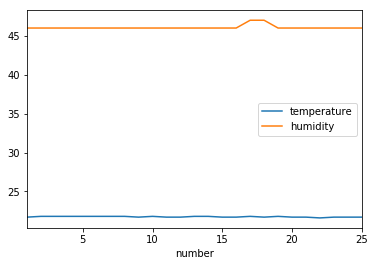

In [4]:
df1.plot()

### 平均値を表示します
mean_1というlist形式の変数に落とし込みます。このままだと温度，湿度両方が入っています。<br>
それぞれを表示するには mean_1['temperature'] のように書きます。

In [7]:
mean_1=df1.mean()
myT1_mean = mean_1['temperature']
myH1_mean = mean_1['humidity']
print('T1 mean %4.2F' % myT1_mean)
print('H1 mean %4.2F' % myH1_mean)

T1 mean 21.74
H1 mean 46.08


### 不偏標準偏差(ustd)を求めます

In [8]:
ustd_1=df1.std()
myT1_ustd = ustd_1['temperature']
myH1_ustd = ustd_1['humidity']
print('T1 ustd %4.2F' % myT1_ustd)
print('H1 ustd %4.2F' % myH1_ustd)

T1 ustd 0.06
H1 ustd 0.28


### 標準誤差(sem)を求めます

In [9]:
sem_1=df1.sem()
myT1_sem = sem_1['temperature']
myH1_sem = sem_1['humidity']
print('T1 sem %4.2F' % myT1_sem)
print('H1 sem %4.2F' % myH1_sem)

T1 sem 0.01
H1 sem 0.06


## 測定２
「温湿度計のセンサーに息を吹きかけるなどしてふらつかせる。」<br>
センサーに息を吹きかけると，温度，湿度ともに少しの時間差の後の動き始めます。
まずは測定しながら様子を見てみるとよいでしょう。様子がつかめてきたら本測定に入ります。

In [10]:
import numpy as np
import pandas as pd

# csv fileを読み込む (df=DataFrame, pandasの機能でcsvファイルを読み込む)
df2 = pd.read_csv('../measure/data_2.csv', index_col='number')

グラフにして見てみましょう。

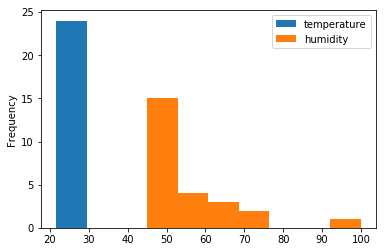

In [11]:
df2.plot(kind='hist')

### 平均値を表示します
mean_2というlist形式の変数に落とし込みます。このままだと温度，湿度両方が入っています。<br>
それぞれを表示するには mean_2['temperature'] のように書きます。

In [12]:
mean_2=df2.mean()
myT2_mean = mean_2['temperature']
myH2_mean = mean_2['humidity']
print('T2 mean %4.2F' % myT2_mean)
print('H2 mean %4.2F' % myH2_mean)

T2 mean 26.87
H2 mean 55.36


### 不偏標準偏差(ustd)を求めます

In [13]:
ustd_2=df2.std()
myT2_ustd = ustd_2['temperature']
myH2_ustd = ustd_2['humidity']
print('T2 ustd %4.2F' % myT2_ustd)
print('H2 ustd %4.2F' % myH2_ustd)

T2 ustd 15.24
H2 ustd 11.88


### 標準誤差(sem)を求めます

In [14]:
sem_2=df2.sem()
myT2_sem = sem_2['temperature']
myH2_sem = sem_2['humidity']
print('T2 sem %4.2F' % myT2_sem)
print('H2 sem %4.2F' % myH2_sem)

T2 sem 3.05
H2 sem 2.38


## 測定 3 
「可能であれば部屋の設定温度を現在よりも+2度にして，温度が落ち着いたら測定。 」<br>
設定温度は＋２度でなくても，何度でもよいのですが，測定１の結果と明らかな違いが出ているか
どうかを確認して下さい。

In [ ]:
import numpy as np
import pandas as pd

# csv fileを読み込む (df=DataFrame, pandasの機能でcsvファイルを読み込む)
df3 = pd.read_csv('../measure/data_3_tmp.csv', index_col='number')

グラフにして見てみましょう。

In [ ]:
df3.plot()

### 平均値を表示します
mean_3というlist形式の変数に落とし込みます。このままだと温度，湿度両方が入っています。<br>
それぞれを表示するには mean_3['temperature'] のように書きます。

In [ ]:
mean_3=df3.mean()
myT3_mean = mean_3['temperature']
myH3_mean = mean_3['humidity']
print('T3 mean %4.2F' % myT3_mean)
print('H3 mean %4.2F' % myH3_mean)

### 不偏標準偏差(ustd)を求めます

In [ ]:
ustd_3=df3.std()
myT3_ustd = ustd_3['temperature']
myH3_ustd = ustd_3['humidity']
print('T3 ustd %4.2F' % myT3_ustd)
print('H3 ustd %4.2F' % myH3_ustd)

### 標準誤差(sem)を求めます

In [ ]:
sem_3=df3.sem()
myT3_sem = sem_3['temperature']
myH3_sem = sem_3['humidity']
print('T3 sem %4.2F' % myT3_sem)
print('H3 sem %4.2F' % myH3_sem)

## 測定４
「各自好きなことをして（温度変更，加湿，など）から測定する。」<br>
これはいろいろと試してみて下さい。

In [ ]:
import numpy as np
import pandas as pd

# csv fileを読み込む (df=DataFrame, pandasの機能でcsvファイルを読み込む)
df4 = pd.read_csv('../measure/data_4_tmp.csv', index_col='number')

グラフにして見てみましょう。

In [ ]:
df4.plot()

### 平均値を表示します
mean_4というlist形式の変数に落とし込みます。このままだと温度，湿度両方が入っています。<br>
それぞれを表示するには mean_4['temperature'] のように書きます。

In [ ]:
mean_4=df4.mean()
myT4_mean = mean_4['temperature']
myH4_mean = mean_4['humidity']
print('T4 mean %4.2F' % myT4_mean)
print('H4 mean %4.2F' % myH4_mean)

### 不偏標準偏差(ustd)を求めます

In [ ]:
ustd_4=df4.std()
myT4_ustd = ustd_4['temperature']
myH4_ustd = ustd_4['humidity']
print('T4 ustd %4.2F' % myT4_ustd)
print('H4 ustd %4.2F' % myH4_ustd)

### 標準誤差(sem)を求めます

In [ ]:
sem_4=df4.sem()
myT4_sem = sem_4['temperature']
myH4_sem = sem_4['humidity']
print('T4 sem %4.2F' % myT4_sem)
print('H4 sem %4.2F' % myH4_sem)

## 測定５
「初期設定に温度等条件を戻して，落ち着いてから測定する 」<br>
これが最終の本測定になります。
ここで結果として現れる，<b>T5 mean, H5 mean の値を報告してもらいます。</b>

In [15]:
import numpy as np
import pandas as pd

# csv fileを読み込む (df=DataFrame, pandasの機能でcsvファイルを読み込む)
df5 = pd.read_csv('../measure/data_5.csv', index_col='number')

グラフにして見てみましょう。

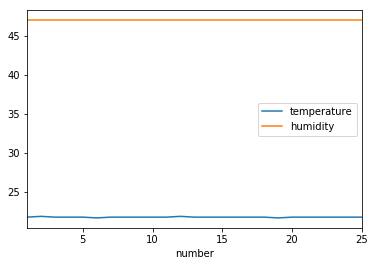

In [16]:
df5.plot()

### 平均値を表示します
mean_5というlist形式の変数に落とし込みます。このままだと温度，湿度両方が入っています。<br>
それぞれを表示するには mean_5['temperature'] のように書きます。

In [17]:
mean_5=df5.mean()
myT5_mean = mean_5['temperature']
myH5_mean = mean_5['humidity']
print('T5 mean %4.2F' % myT5_mean)
print('H5 mean %4.2F' % myH5_mean)

T5 mean 21.80
H5 mean 47.00


### 不偏標準偏差(ustd)を求めます

In [18]:
ustd_5=df5.std()
myT5_ustd = ustd_5['temperature']
myH5_ustd = ustd_5['humidity']
print('T5 ustd %4.2F' % myT5_ustd)
print('H5 ustd %4.2F' % myH5_ustd)

T5 ustd 0.04
H5 ustd 0.00


### 標準誤差(sem)を求めます

In [19]:
sem_5=df5.sem()
myT5_sem = sem_5['temperature']
myH5_sem = sem_5['humidity']
print('T5 sem %4.2F' % myT5_sem)
print('H5 sem %4.2F' % myH5_sem)

T5 sem 0.01
H5 sem 0.00


# 測定後の考察
取得したデータを元にいろいろと考察して頂けるとよいですが，<br>
例えば考察案としては，

* 測定１と５の差（時間は10分くらい開ける）があるか，変化量を出す<br>
* 測定２の平均値は１と比べてどう増えたか，分散の大きさは変わったか<br>
* 測定３と測定１の差が＋２度になっているか<br>
* 測定４で想定した数字になったか <br>

などです。すでに結果は変数に落としているので，例えば測定３と測定１の差を
見たければ以下のようにします。<br>
"{:4.2F}".formatというのは，Float(小数）に対して，全桁を4桁にして，小数点以下2桁まで表示する形式
（フォーマット）にしなさいという意味です。


In [20]:
"{:4.2F}".format(myT3_mean - myT1_mean)

NameError: name 'myT3_mean' is not defined

In [21]:
"{:4.2F}".format(myT5_mean-myT1_mean)

'0.06'